In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [3]:
#from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 7), "xtick.bottom": True, "grid.linestyle": ":"})

### Preprocessing

In [4]:
PATH = "../data/easteregg_everything_so_far_250"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [5]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [6]:
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']

In [7]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [8]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
#data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\1923954766.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [9]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

# Framework Latency

In [10]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_DARK_GREEN = '#416224'
COLOR_MEDIUMDARK_GREEN = '#4FB800'
COLOR_MEDIUMLIGHT_GREEN = '#AEA700'
COLOR_LIGHT_GREEN = '#CDD30F'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'
PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]

PALETTE_GREENS = [COLOR_DARK_GREEN, COLOR_MEDIUMDARK_GREEN, COLOR_MEDIUMLIGHT_GREEN, COLOR_LIGHT_GREEN]
PALETTE_MULTI = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_GREEN, COLOR_DARK_RED, HEIDENELKE_1]

In [11]:
data[data['diff'] < -1]

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete,fw,diff
0,0,0,487,GLUT,3D,GLUT_3D,fullscreen,2.0,windup,5.470,52.865,-47.395
1,1,1,487,GLUT,3D,GLUT_3D,fullscreen,2.0,windup,7.181,67.768,-60.587
2,2,2,487,GLUT,3D,GLUT_3D,fullscreen,2.0,windup,6.221,34.302,-28.081
3,3,3,487,GLUT,3D,GLUT_3D,fullscreen,2.0,windup,6.078,26.588,-20.510
4,4,4,487,GLUT,3D,GLUT_3D,fullscreen,2.0,windup,6.578,62.660,-56.082
...,...,...,...,...,...,...,...,...,...,...,...,...
218,218,218,515,win32,default,win32_default,fullscreen,2.0,windup,7.372,10.725,-3.353
242,242,242,515,win32,default,win32_default,fullscreen,2.0,windup,7.532,9.299,-1.767
36,36,36,515,win32,rects,win32_rects,fullscreen,2.0,windup,19.832,22.641,-2.809
0,0,0,516,wxpython,image,wxpython_image,fullscreen,2.0,windup,7.530,8.811,-1.281


In [12]:
data = data[data['diff'] >= -1]

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\1914046661.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


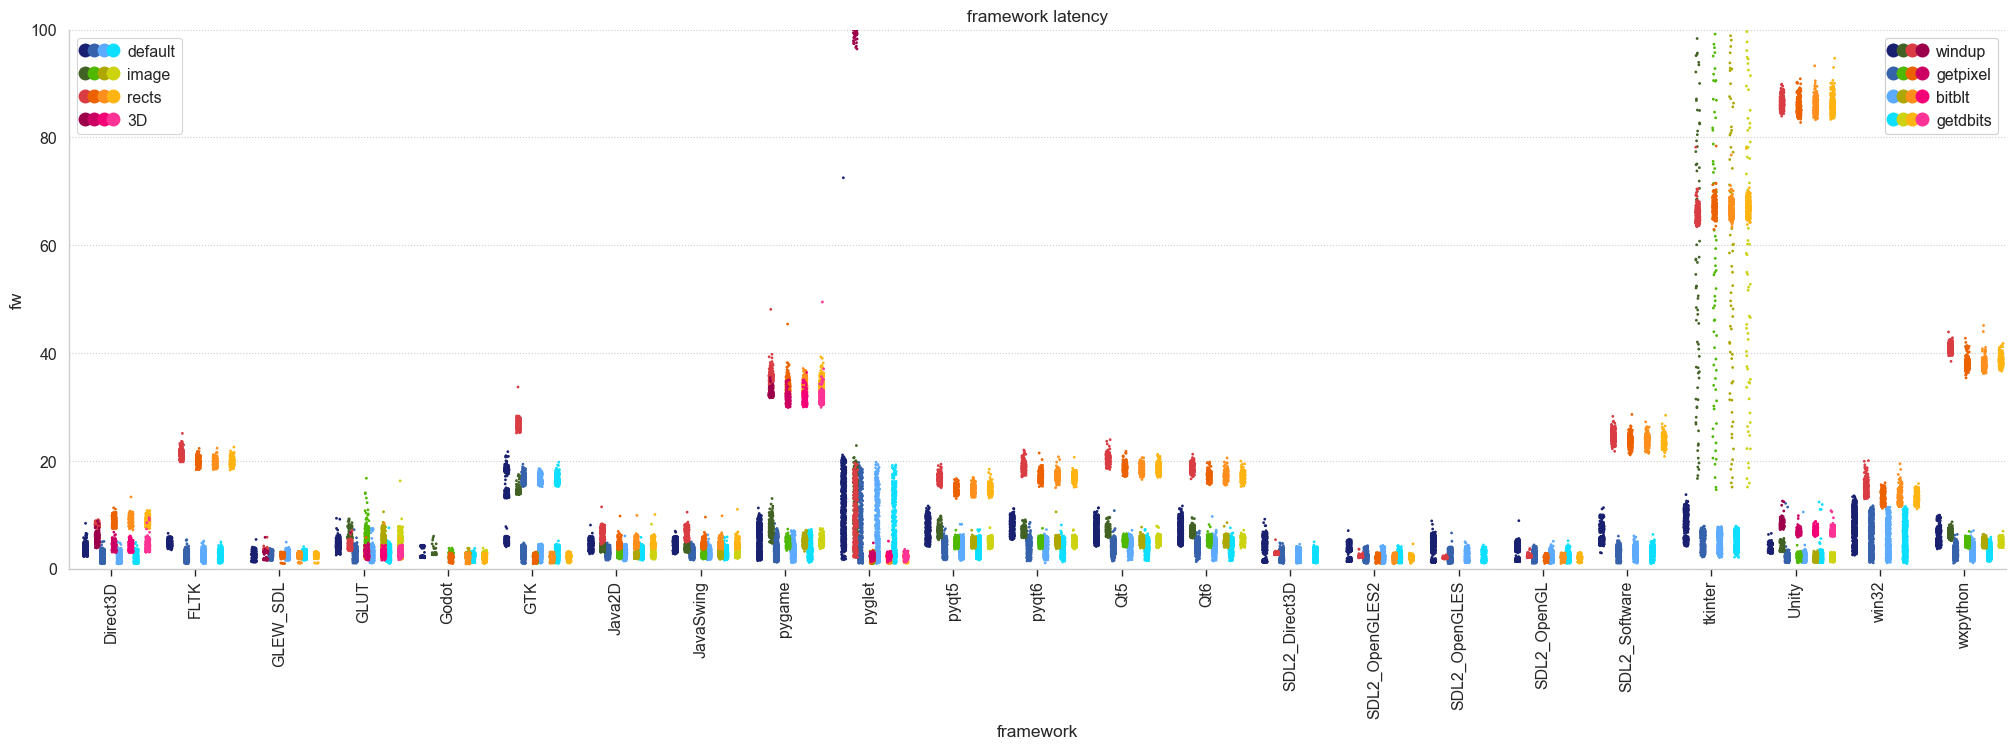

In [13]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['complexity'] == 'default'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)
sns.stripplot(data=data[data['complexity'] == 'image'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data[data['complexity'] == 'rects'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data[data['complexity'] == '3D'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=2)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 100)

handles, labels = plot.get_legend_handles_labels()

handles_windup = (handles[0], handles[4], handles[8], handles[12])
handles_getpixel = (handles[1], handles[5], handles[9], handles[13])
handles_bitblt = (handles[2], handles[6], handles[10], handles[14])
handles_getdbits = (handles[3], handles[7], handles[11], handles[15])

handles_default = (handles[0], handles[1], handles[2], handles[3])
handles_image = (handles[4], handles[5], handles[6], handles[7])
handles_rects = (handles[8], handles[9], handles[10], handles[11])
handles_3d = (handles[12], handles[13], handles[14], handles[15])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
program_legend = plot.legend([handles_windup, handles_getpixel, handles_bitblt, handles_getdbits], ['windup', 'getpixel', 'bitblt', 'getdbits'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plot.set_title('framework latency')
sns.despine(bottom = False, left = False)

### Framework Latencies per Complexity Condition Separately

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\58910804.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


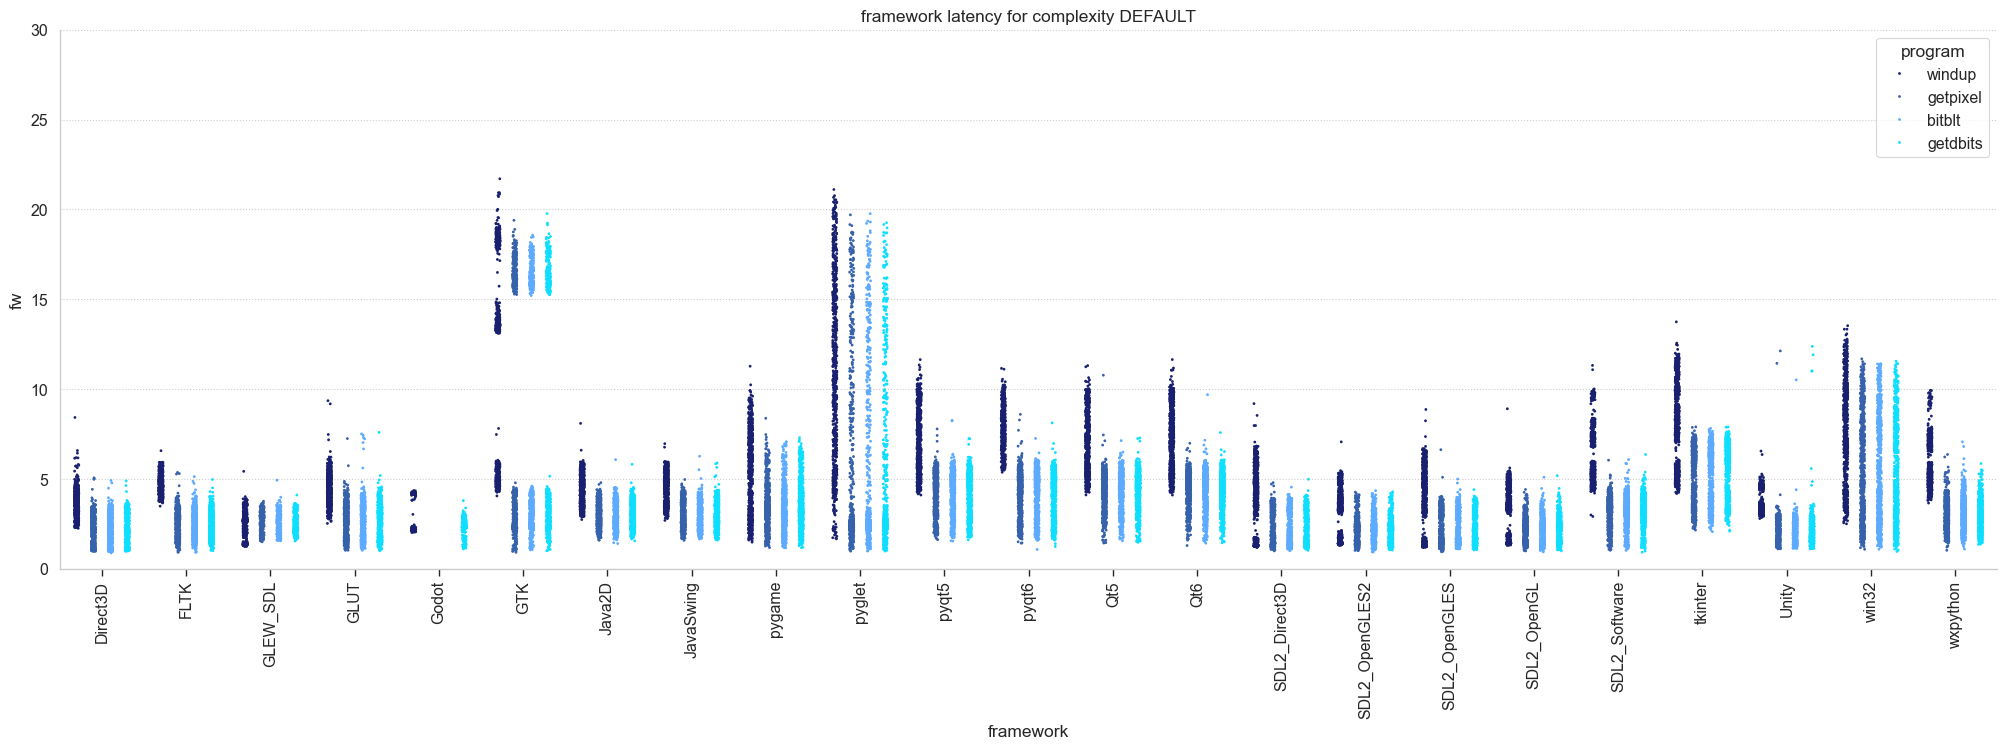

In [14]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'default']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)

plot.set_ylim(0, 30)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity DEFAULT')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\2164569297.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


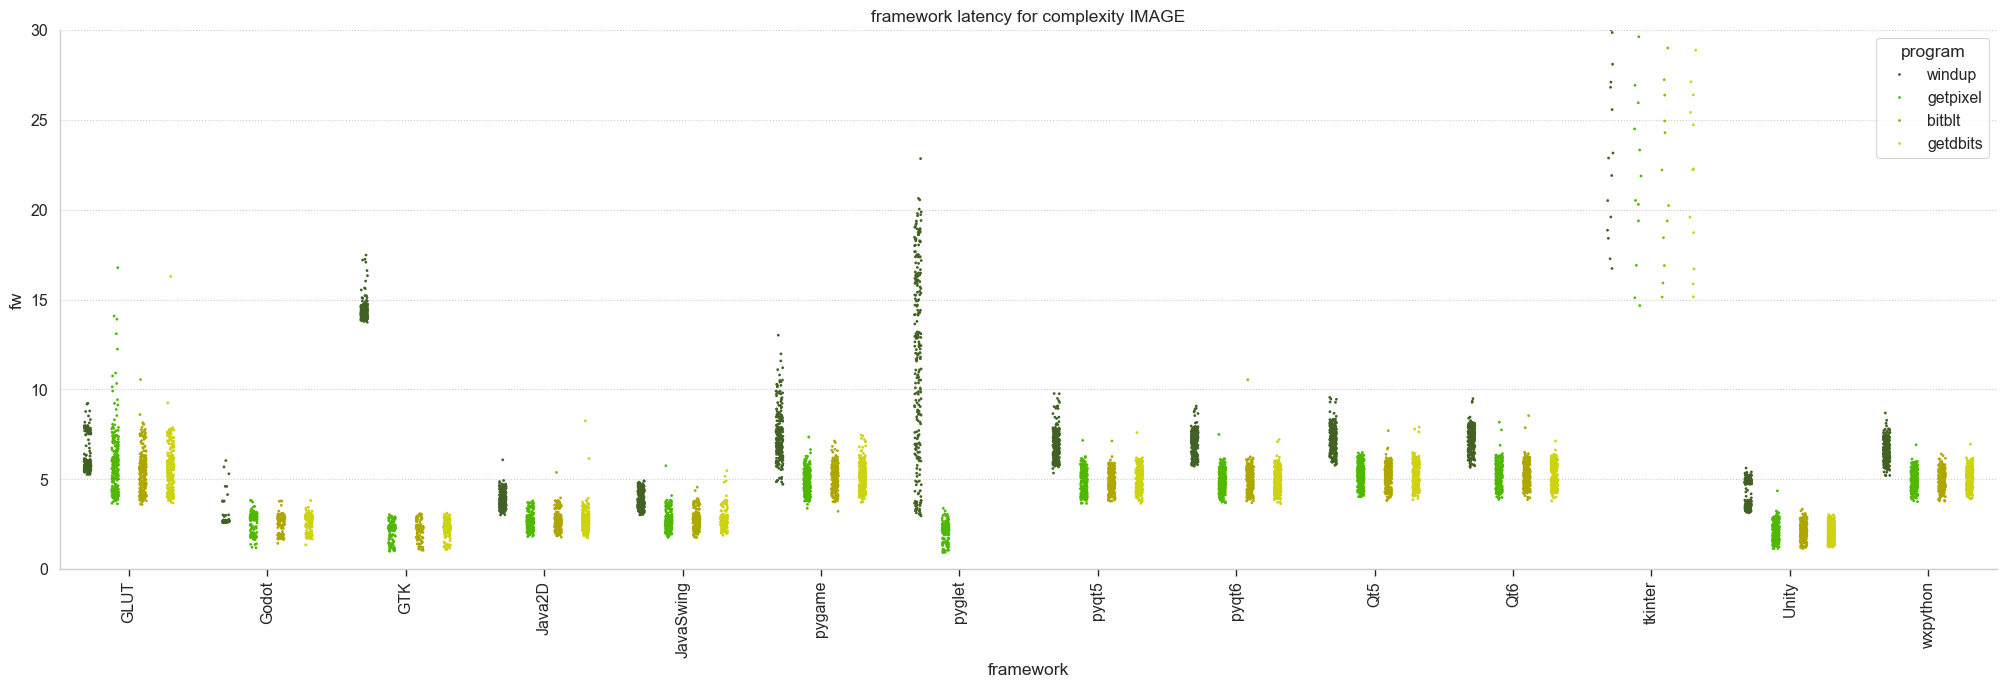

In [15]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'image']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS, size=2)

plot.set_ylim(0, 30)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity IMAGE')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\3926600980.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


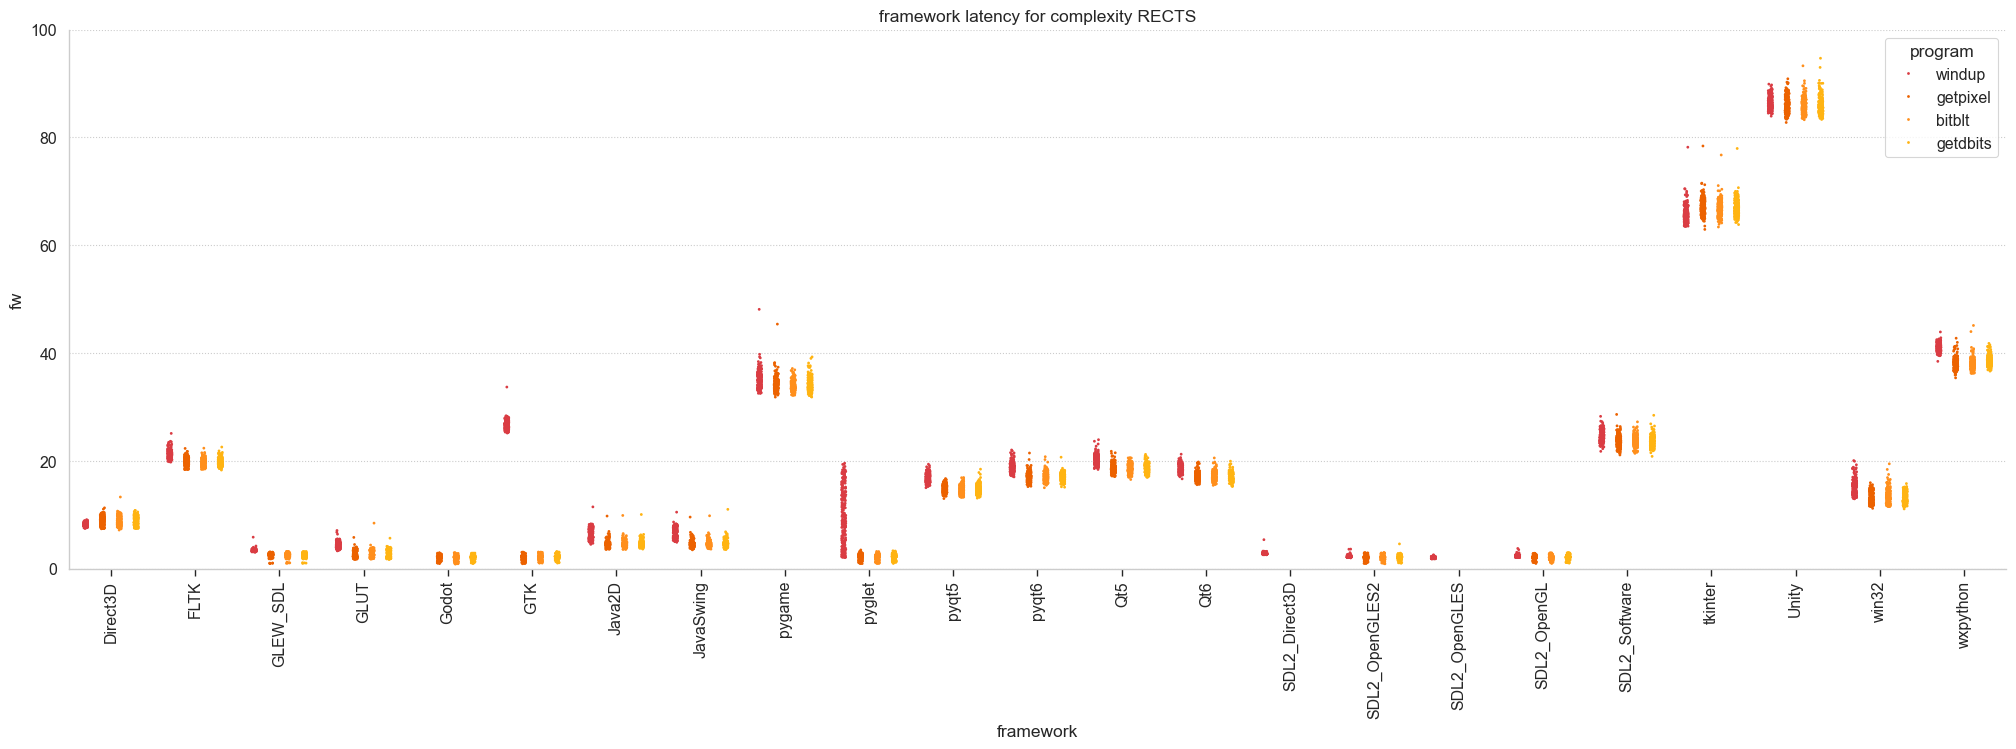

In [16]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'rects']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, size=2)

plot.set_ylim(0, 100)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity RECTS')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\3996393533.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


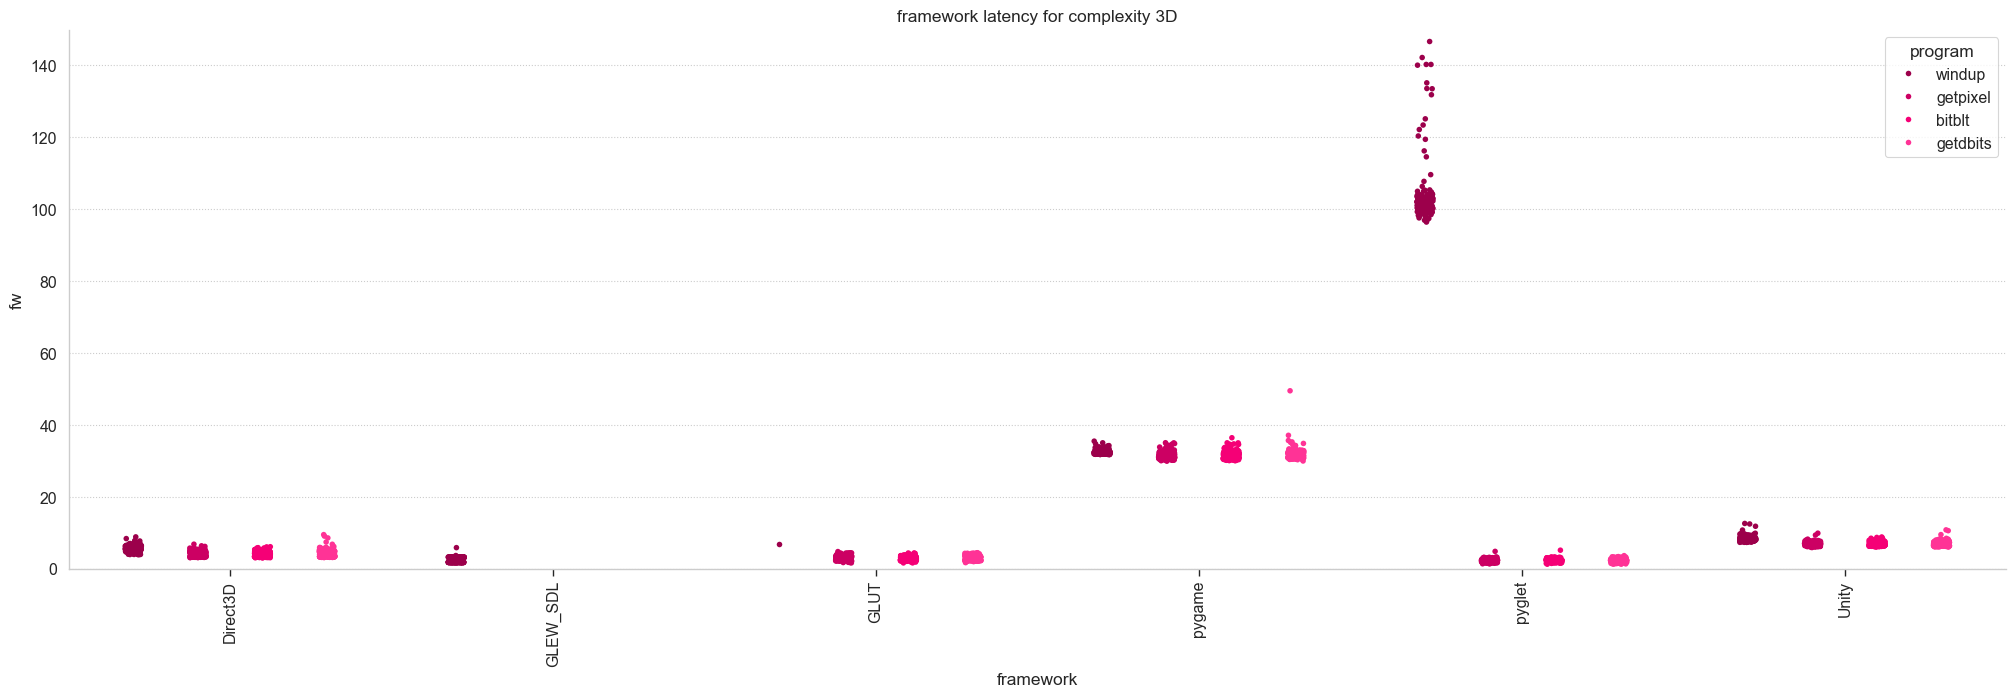

In [17]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == '3D']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, size=4)

plot.set_ylim(0, 150)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity 3D')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\528355104.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_156\528355104.py:22: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


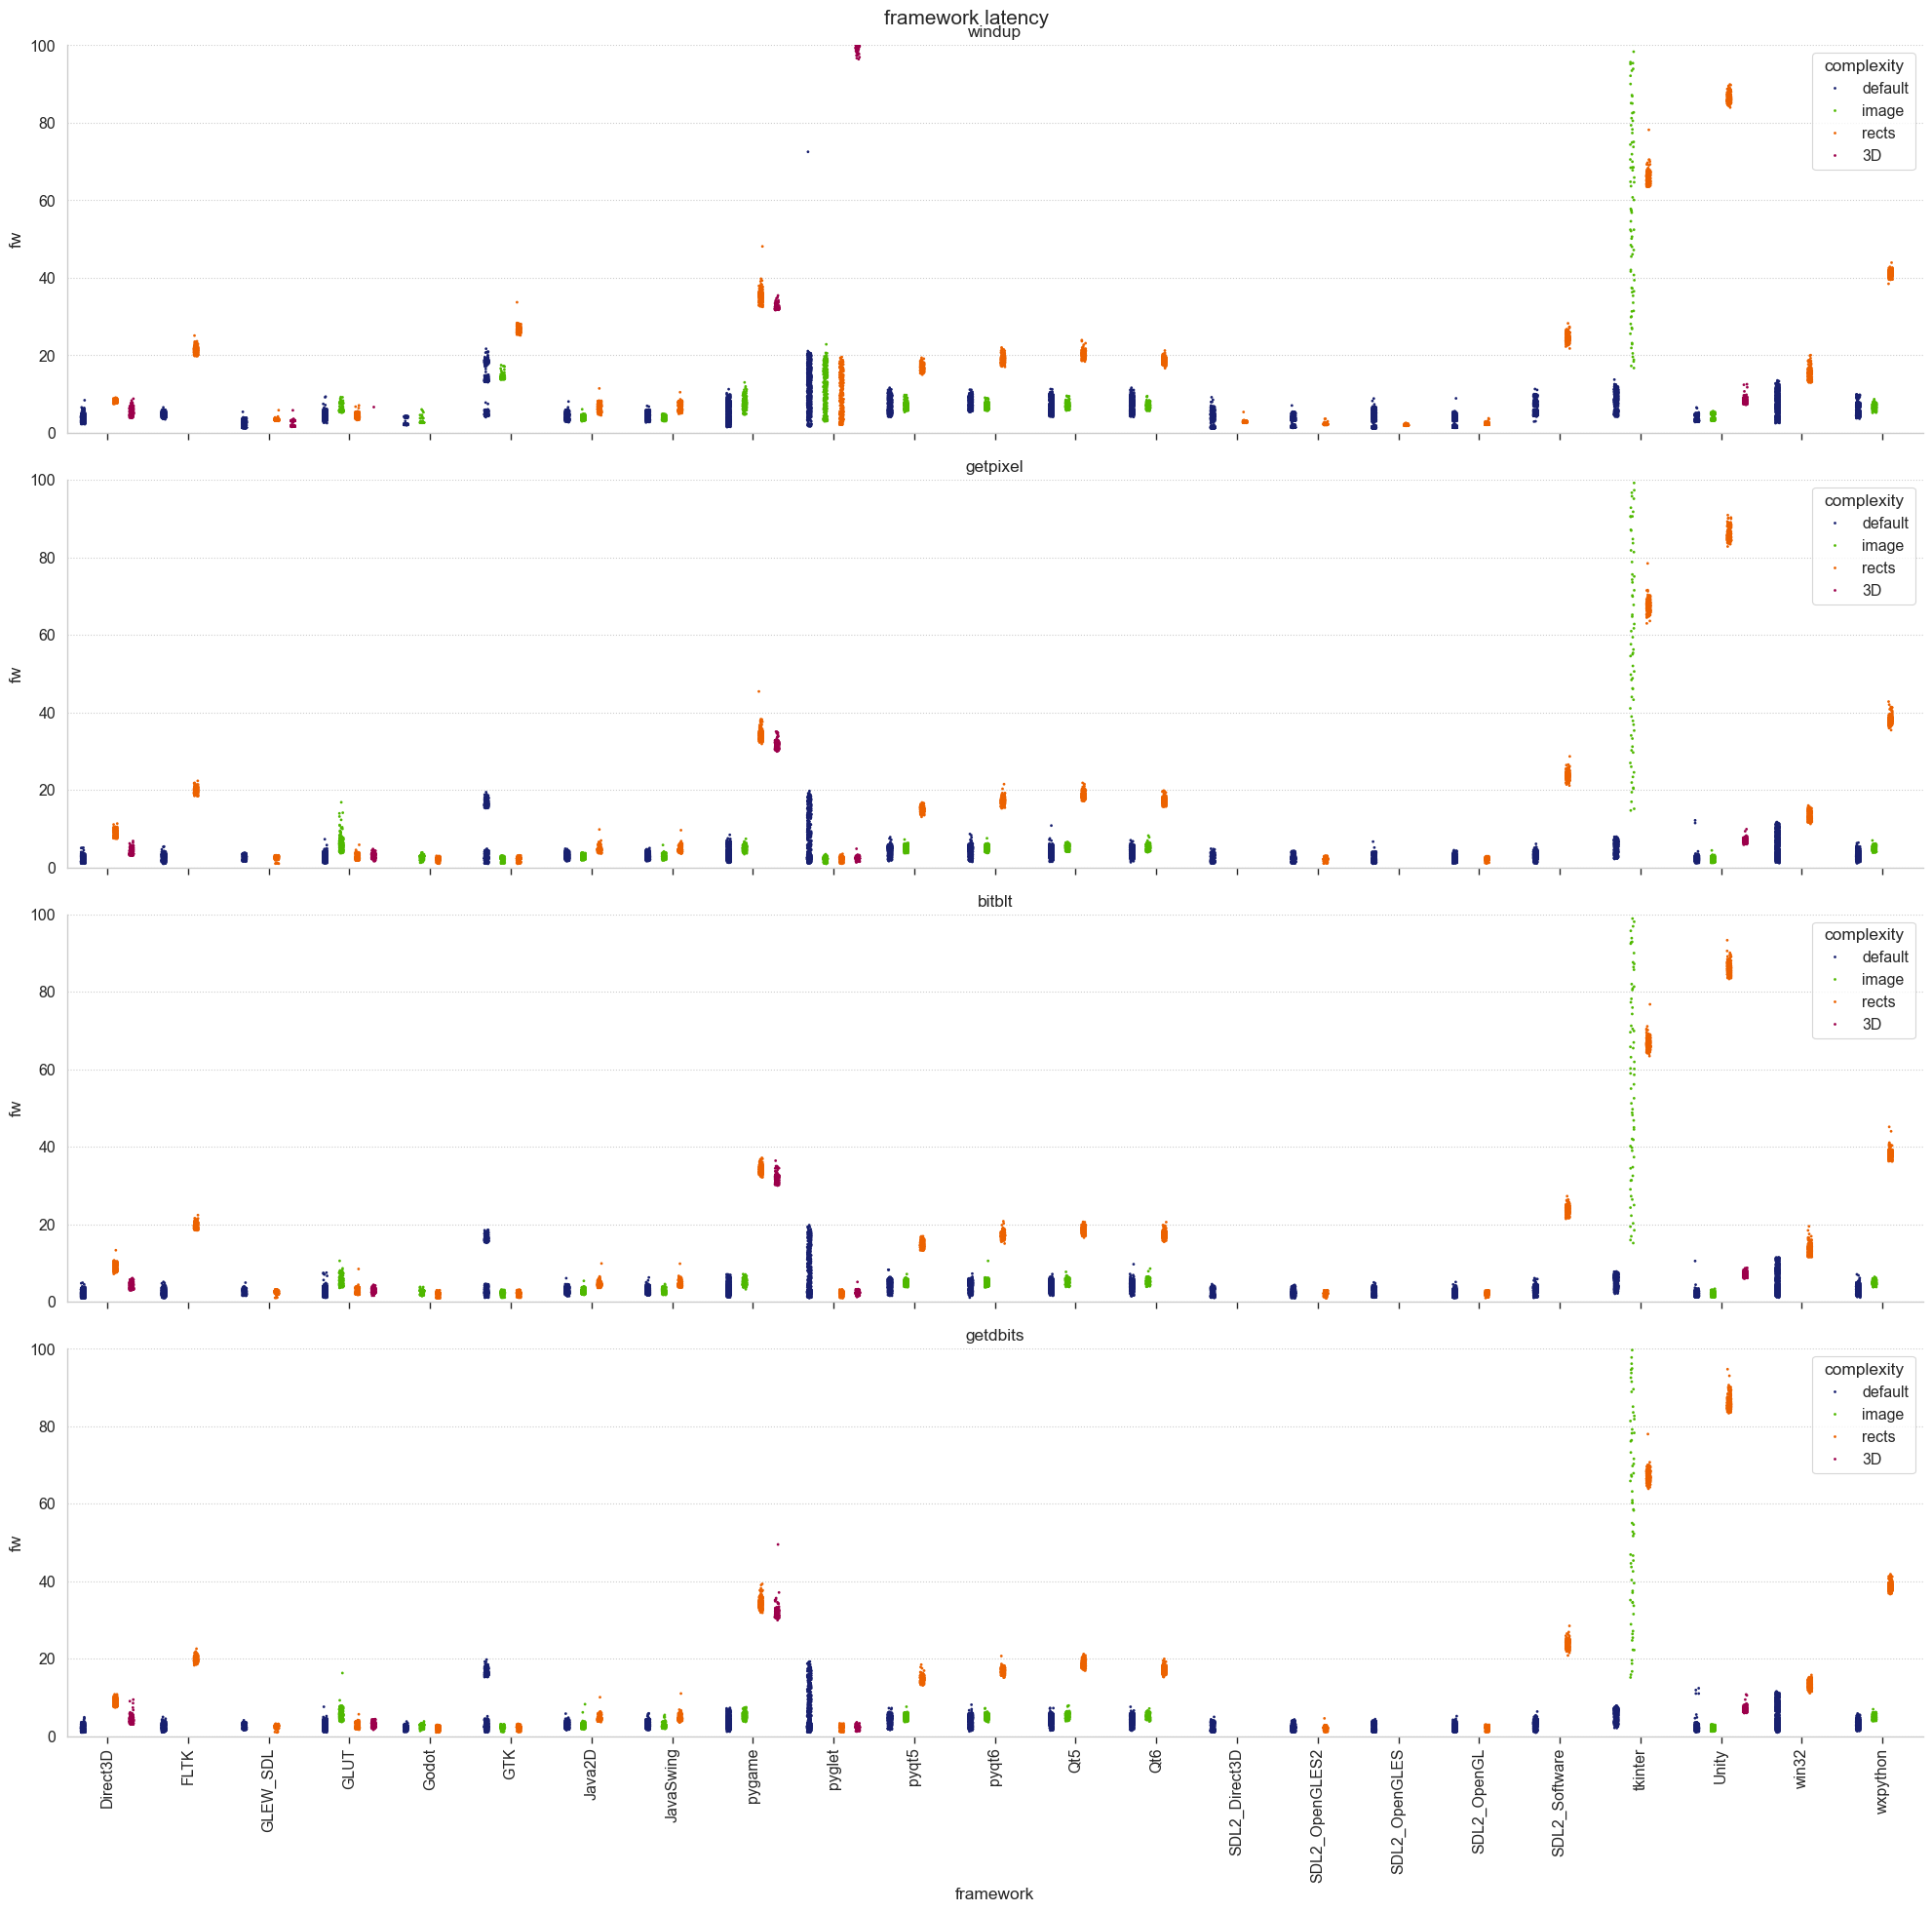

In [23]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("framework latency")

plot_windup = sns.stripplot(ax=axs[0], data=data[data['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_windup.set_title('windup')
axs[0].set_ylim(0, 100)

plot_getpixel = sns.stripplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getpixel.set_title('getpixel')
axs[1].set_ylim(0, 100)

plot_bitblt = sns.stripplot(ax=axs[2], data=data[data['program'] == 'bitblt'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_bitblt.set_title('bitblt')
axs[2].set_ylim(0, 100)

plot_getdbits = sns.stripplot(ax=axs[3], data=data[data['program'] == 'getdbits'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getdbits.set_title('getdbits')
axs[3].set_ylim(0, 100)

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

fig.tight_layout()
sns.despine(bottom = False, left = False)

In [19]:
# default
data_temp = data[data['complexity'] == 'default']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians


\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & 3.66 & 2.23 & 2.25 & 2.23 \\
FLTK & 4.65 & 2.42 & 2.40 & 2.35 \\
GLEW_SDL & 2.63 & 2.60 & 2.59 & 2.61 \\
GLUT & 4.41 & 2.80 & 2.69 & 2.82 \\
Godot & 2.19 & NaN & NaN & 2.37 \\
GTK & 13.58 & 3.41 & 3.33 & 3.39 \\
Java2D & 4.36 & 2.91 & 2.83 & 2.89 \\
JavaSwing & 4.47 & 2.87 & 2.87 & 2.92 \\
pygame & 5.80 & 3.26 & 3.21 & 3.32 \\
pyglet & 11.29 & 2.50 & 2.54 & 2.56 \\
pyqt5 & 6.76 & 4.58 & 4.59 & 4.56 \\
pyqt6 & 7.87 & 4.57 & 4.62 & 4.60 \\
Qt5 & 6.82 & 4.51 & 4.67 & 4.56 \\
Qt6 & 6.91 & 4.61 & 4.61 & 4.52 \\
SDL2_Direct3D & 3.92 & 1.84 & 1.95 & 1.81 \\
SDL2_OpenGLES2 & 3.30 & 2.18 & 2.19 & 2.19 \\
SDL2_OpenGLES & 3.90 & 1.83 & 1.92 & 1.81 \\
SDL2_OpenGL & 3.31 & 2.17 & 2.17 & 2.20 \\
SDL2_Software & 5.51 & 3.31 & 3.30 & 3.25 \\
tkinter & 8.12 & 5.99 & 6.08 & 6.10 \\
Unity & 3.58 & 2.13 & 2.10 & 2.12 \\
win32 & 7.44 & 4.63 & 4.28 & 4.25 \\
wxpython & 5.29 & 2.96 & 2.96 & 2.96 \\
\botto

,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,3.6595,2.2290,2.2460,2.2300
1,FLTK,4.6505,2.4190,2.4045,2.3485
2,GLEW_SDL,2.6280,2.6040,2.5895,2.6085
3,GLUT,4.4085,2.7965,2.6865,2.8240
4,Godot,2.1900,NaN,NaN,2.3690
5,GTK,13.5755,3.4110,3.3350,3.3890
6,Java2D,4.3550,2.9135,2.8320,2.8940
7,JavaSwing,4.4685,2.8720,2.8740,2.9160
8,pygame,5.8010,3.2615,3.2150,3.3220
9,pyglet,11.2950,2.4955,2.5400,2.5605


In [20]:
# image
data_temp = data[data['complexity'] == 'image']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & NaN & NaN & NaN & NaN \\
FLTK & NaN & NaN & NaN & NaN \\
GLEW_SDL & NaN & NaN & NaN & NaN \\
GLUT & 5.77 & 5.73 & 5.27 & 5.52 \\
Godot & 2.68 & 2.85 & 2.81 & 2.85 \\
GTK & 14.20 & 2.29 & 2.29 & 2.32 \\
Java2D & 3.74 & 2.66 & 2.68 & 2.68 \\
JavaSwing & 3.69 & 2.72 & 2.72 & 2.72 \\
pygame & 7.24 & 4.95 & 4.98 & 5.16 \\
pyglet & 11.93 & 2.22 & NaN & NaN \\
pyqt5 & 6.94 & 4.91 & 4.91 & 4.96 \\
pyqt6 & 7.01 & 5.00 & 5.02 & 4.99 \\
Qt5 & 7.21 & 5.28 & 5.29 & 5.23 \\
Qt6 & 7.20 & 5.27 & 5.16 & 5.23 \\
SDL2_Direct3D & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES2 & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES & NaN & NaN & NaN & NaN \\
SDL2_OpenGL & NaN & NaN & NaN & NaN \\
SDL2_Software & NaN & NaN & NaN & NaN \\
tkinter & 148.16 & 175.70 & 175.84 & 176.25 \\
Unity & 4.12 & 2.21 & 2.11 & 1.99 \\
win32 & NaN & NaN & NaN & NaN \\
wxpython & 6.55 & 4.93 & 4.95 & 4.97 \\
\bottomrule
\end{tabular}



,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,NaN,NaN,NaN,NaN
1,FLTK,NaN,NaN,NaN,NaN
2,GLEW_SDL,NaN,NaN,NaN,NaN
3,GLUT,5.7745,5.7315,5.2710,5.5190
4,Godot,2.6770,2.8480,2.8110,2.8530
5,GTK,14.1995,2.2865,2.2895,2.3205
6,Java2D,3.7430,2.6600,2.6845,2.6840
7,JavaSwing,3.6915,2.7245,2.7185,2.7195
8,pygame,7.2370,4.9500,4.9785,5.1575
9,pyglet,11.9340,2.2200,NaN,NaN


In [21]:
# rects
data_temp = data[data['complexity'] == 'rects']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & 8.18 & 8.71 & 8.63 & 8.80 \\
FLTK & 21.27 & 19.91 & 19.63 & 19.86 \\
GLEW_SDL & 3.34 & 2.60 & 2.58 & 2.60 \\
GLUT & 4.48 & 2.46 & 2.54 & 2.71 \\
Godot & NaN & 2.16 & 2.14 & 2.19 \\
GTK & 26.55 & 2.25 & 2.26 & 2.28 \\
Java2D & 6.45 & 4.51 & 4.49 & 4.55 \\
JavaSwing & 6.84 & 4.50 & 4.49 & 4.54 \\
pygame & 35.11 & 33.88 & 33.74 & 33.96 \\
pyglet & 9.52 & 2.25 & 2.25 & 2.25 \\
pyqt5 & 16.76 & 14.76 & 14.69 & 14.89 \\
pyqt6 & 18.80 & 17.07 & 17.14 & 16.95 \\
Qt5 & 20.34 & 18.69 & 18.60 & 18.66 \\
Qt6 & 18.65 & 17.13 & 17.29 & 17.17 \\
SDL2_Direct3D & 2.75 & NaN & NaN & NaN \\
SDL2_OpenGLES2 & 2.18 & 2.13 & 2.15 & 2.14 \\
SDL2_OpenGLES & 1.94 & NaN & NaN & NaN \\
SDL2_OpenGL & 2.23 & 2.12 & 2.12 & 2.13 \\
SDL2_Software & 24.48 & 23.85 & 23.68 & 23.69 \\
tkinter & 65.45 & 67.16 & 66.72 & 66.99 \\
Unity & 86.26 & 85.50 & 85.73 & 85.61 \\
win32 & 15.11 & 12.97 & 13.09 & 12.83 \\
wxpython & 4

,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,8.1750,8.7085,8.6335,8.8005
1,FLTK,21.2710,19.9115,19.6255,19.8570
2,GLEW_SDL,3.3445,2.5950,2.5825,2.6040
3,GLUT,4.4790,2.4555,2.5440,2.7140
4,Godot,NaN,2.1640,2.1375,2.1880
5,GTK,26.5450,2.2490,2.2590,2.2755
6,Java2D,6.4490,4.5060,4.4935,4.5455
7,JavaSwing,6.8385,4.5020,4.4870,4.5430
8,pygame,35.1110,33.8775,33.7415,33.9620
9,pyglet,9.5160,2.2525,2.2490,2.2550


In [22]:
# 3D
data_temp = data[data['complexity'] == '3D']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & 5.43 & 3.83 & 3.79 & 3.86 \\
FLTK & NaN & NaN & NaN & NaN \\
GLEW_SDL & 1.83 & NaN & NaN & NaN \\
GLUT & 6.77 & 2.79 & 2.65 & 2.66 \\
Godot & NaN & NaN & NaN & NaN \\
GTK & NaN & NaN & NaN & NaN \\
Java2D & NaN & NaN & NaN & NaN \\
JavaSwing & NaN & NaN & NaN & NaN \\
pygame & 32.26 & 31.61 & 31.79 & 31.78 \\
pyglet & 101.89 & 2.31 & 2.33 & 2.34 \\
pyqt5 & NaN & NaN & NaN & NaN \\
pyqt6 & NaN & NaN & NaN & NaN \\
Qt5 & NaN & NaN & NaN & NaN \\
Qt6 & NaN & NaN & NaN & NaN \\
SDL2_Direct3D & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES2 & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES & NaN & NaN & NaN & NaN \\
SDL2_OpenGL & NaN & NaN & NaN & NaN \\
SDL2_Software & NaN & NaN & NaN & NaN \\
tkinter & NaN & NaN & NaN & NaN \\
Unity & 8.18 & 6.76 & 6.81 & 6.83 \\
win32 & NaN & NaN & NaN & NaN \\
wxpython & NaN & NaN & NaN & NaN \\
\bottomrule
\end{tabular}



,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,5.4325,3.8340,3.7910,3.8580
1,FLTK,NaN,NaN,NaN,NaN
2,GLEW_SDL,1.8290,NaN,NaN,NaN
3,GLUT,6.7740,2.7900,2.6485,2.6585
4,Godot,NaN,NaN,NaN,NaN
5,GTK,NaN,NaN,NaN,NaN
6,Java2D,NaN,NaN,NaN,NaN
7,JavaSwing,NaN,NaN,NaN,NaN
8,pygame,32.2615,31.6090,31.7870,31.7780
9,pyglet,101.8935,2.3105,2.3285,2.3385
